In [3]:
# On importe les librairies necessaires 
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# Voici un exemple d'exécution de la reconnaissance faciale sur une seule image
# et dessiner une boîte autour de chaque personne identifiée.

# Charger un exemple d'image et apprenez à le reconnaître.
#lounis_OUMOHAND 
Lounis_OUMOHAND = face_recognition.load_image_file(r"C:\Users\oumoh\Downloads\Lounis.jpg")
Lounis_face_encoding = face_recognition.face_encodings(Lounis_OUMOHAND)[0]

#Nabil_BENSAFIA
Nabil_BENSAFIA = face_recognition.load_image_file(r"C:\Users\oumoh\Downloads\nabil.png")
Nabil_face_encoding = face_recognition.face_encodings(Nabil_BENSAFIA)[0]



# Créer des tableaux d'encodages de visage connus et leurs noms
known_face_encodings = [
    Lounis_face_encoding,
    Nabil_face_encoding 
    
 
]
known_face_names = [
     "Lounis OUMOHAND",
      "Nabil BENSAFIA"

]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 2 images.


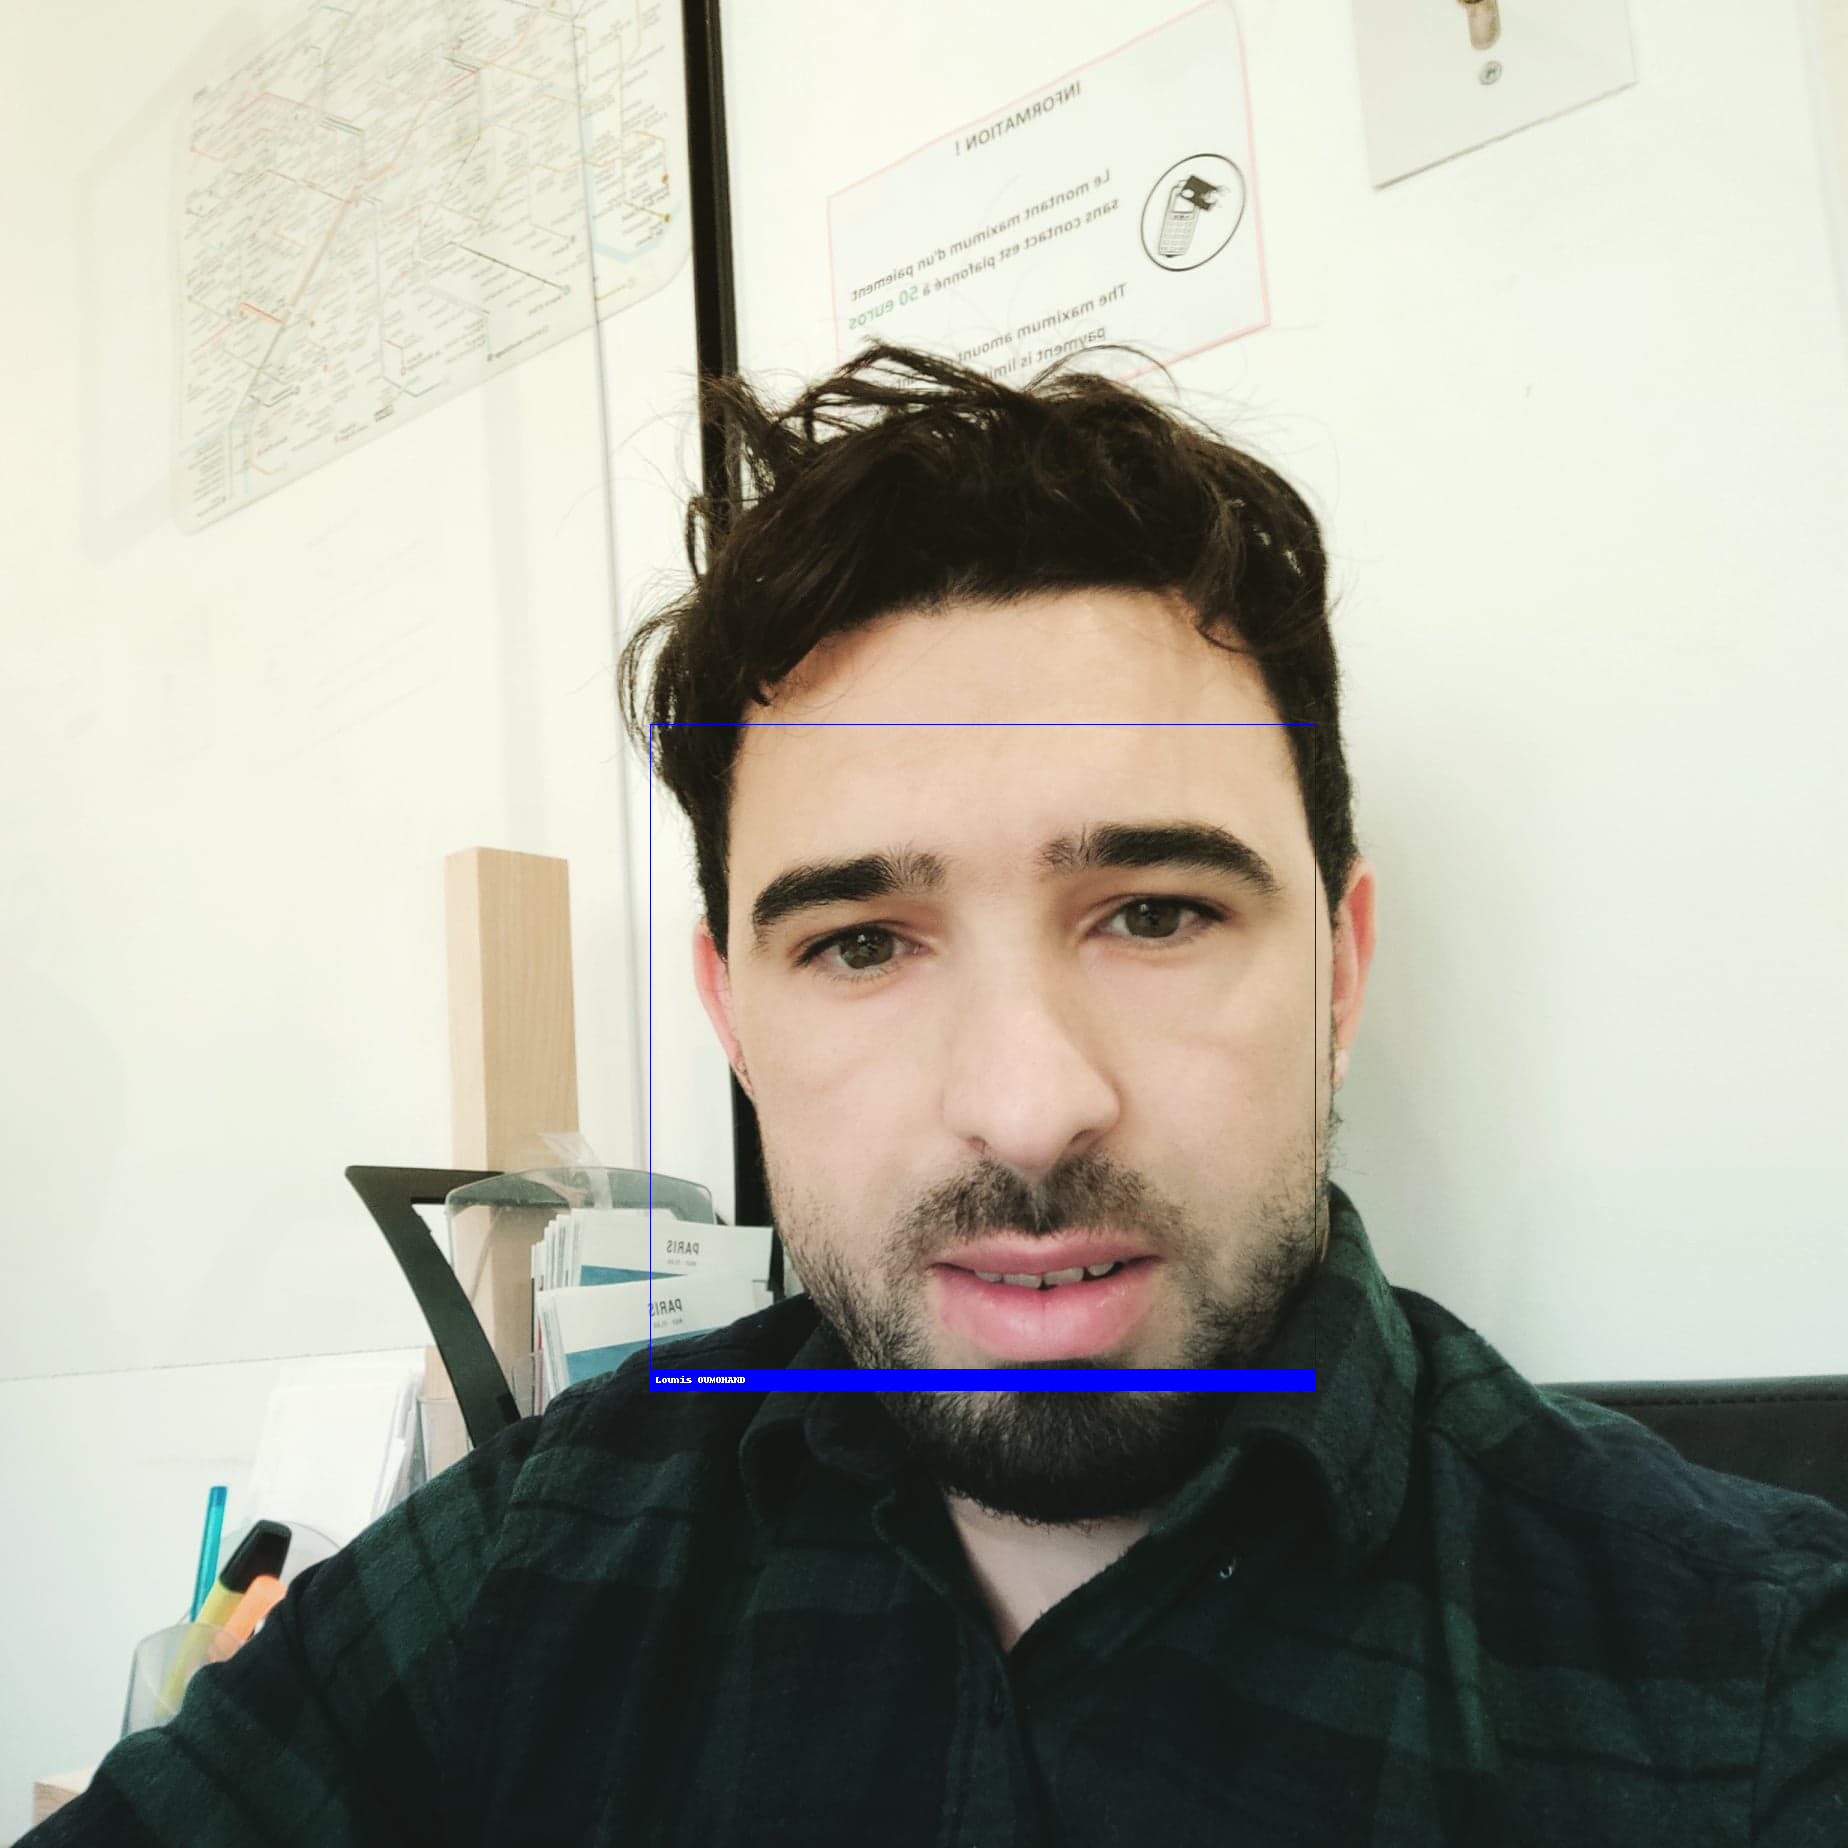

In [6]:
# Charger une image avec un visage inconnu

unknown_image = face_recognition.load_image_file(r"C:\Users\oumoh\Downloads\lounes.jpg")
# Trouver tous les visages et encodages de visage dans l'image inconnue
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convertir l'image en une image au format PIL afin que nous puissions dessiner dessus avec la bibliothèque Pillow
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Créer une instance Pillow ImageDraw Draw avec laquelle on dessine
draw = ImageDraw.Draw(pil_image)

# Boucle for sur chaque visage trouvé dans l'image inconnue
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # Voir si le visage correspond au(x) visage(s) connu(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Ou plutôt utiliser un visage connu avec la plus petite distance par rapport au nouveau visage
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Dessinez une boîte autour du visage à l'aide de la bibliothèque Pillow
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Dessinez une étiquette avec un nom sous le visage
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Supprimer la bibliothèque de dessins de la mémoire selon les documents Pillow
del draw

# Afficher l'image résultante
display(pil_image)